In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('comprehensive_preeclampsia_dataset.csv')

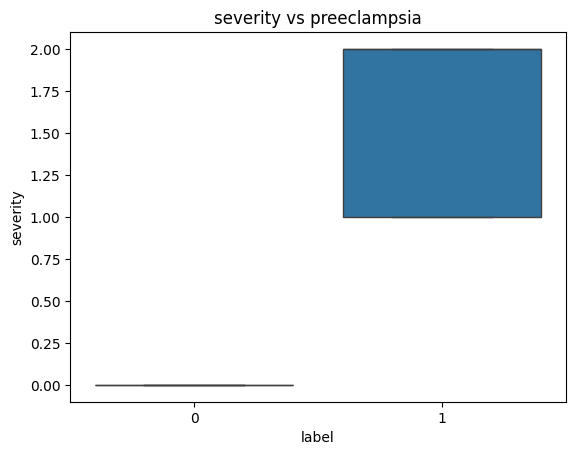

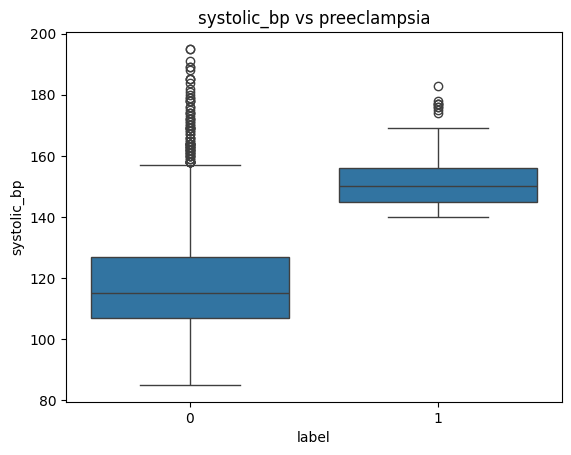

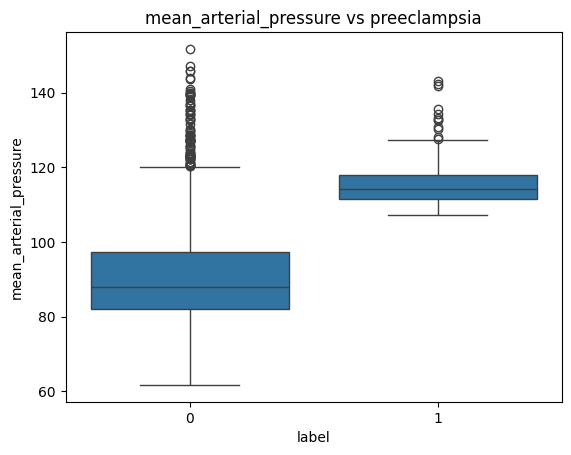

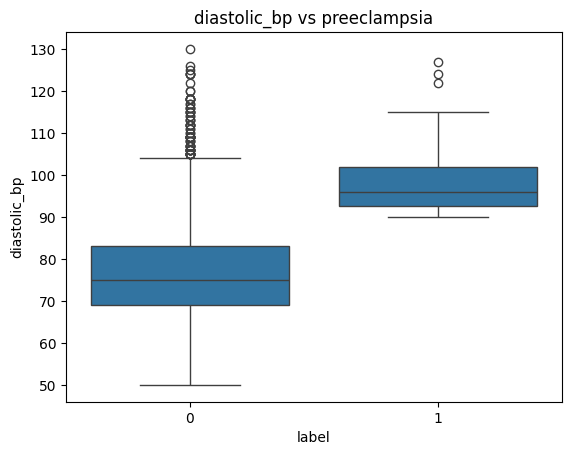

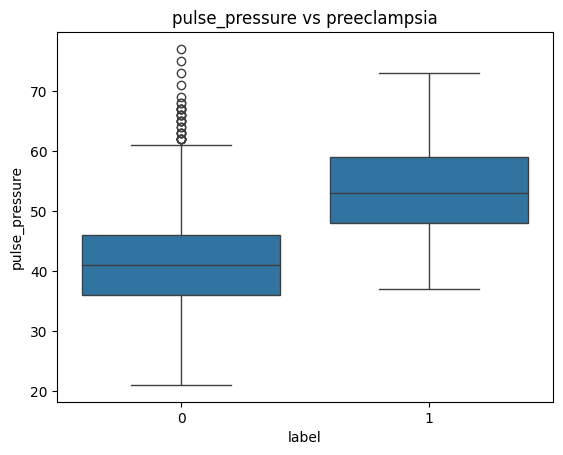

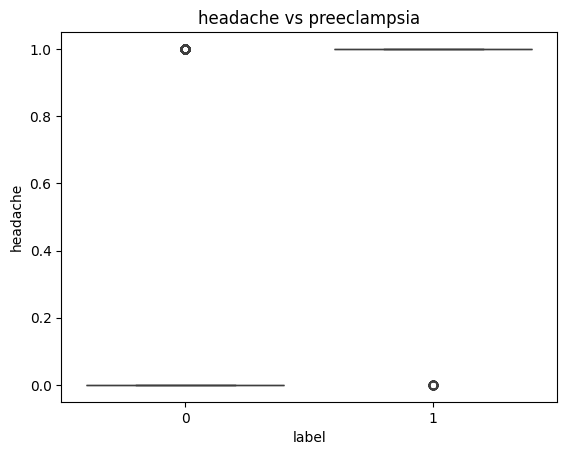

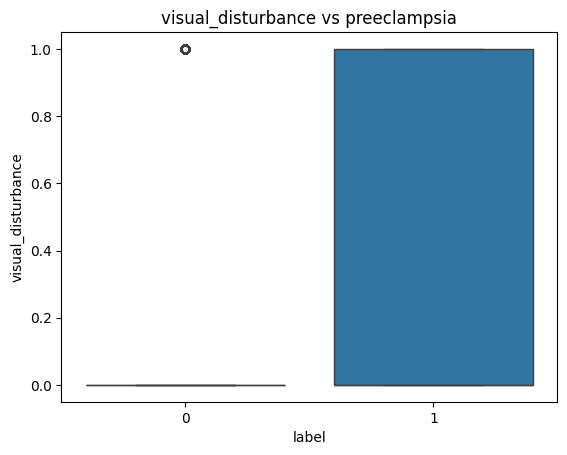

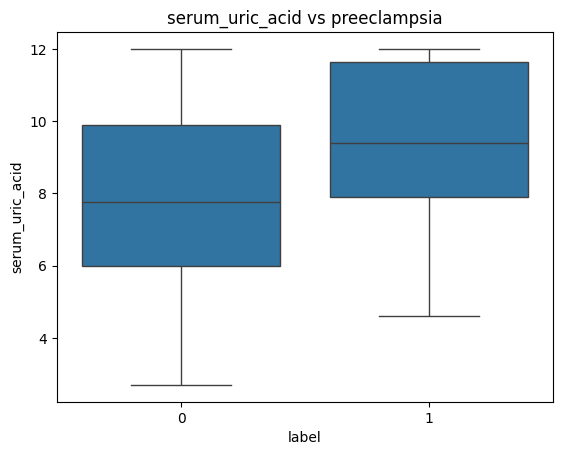

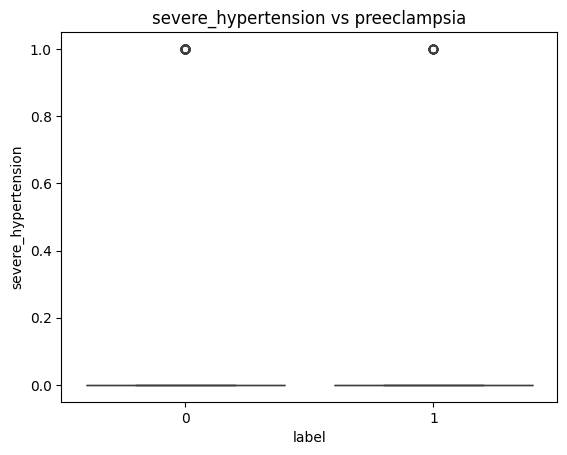

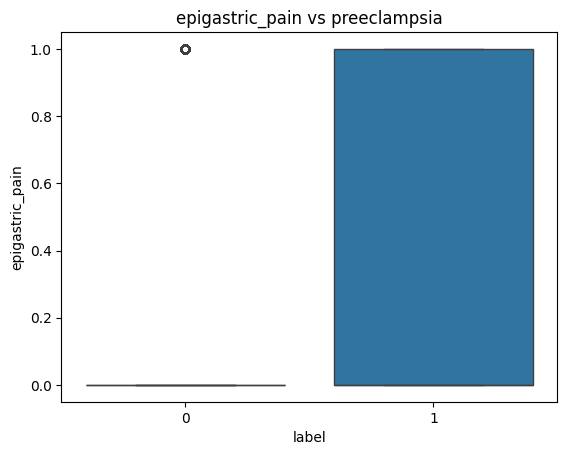

In [15]:
top_features = [
    'severity', 'systolic_bp', 'mean_arterial_pressure', 'diastolic_bp',
    'pulse_pressure', 'headache', 'visual_disturbance', 'serum_uric_acid',
    'severe_hypertension', 'epigastric_pain'
]


for feature in top_features:
    sns.boxplot(data=df, x='label', y=feature)                   
    plt.title(f'{feature} vs preeclampsia')
    plt.show()

In [16]:
features_to_scale=[
    'age', 'gestational_age', 'bmi',
    'systolic_bp', 'diastolic_bp', 'mean_arterial_pressure', 'pulse_pressure',
    'serum_creatinine', 'serum_uric_acid', 'uric_acid_creatinine_ratio',
    'blood_urea_nitrogen', 'alt_sgpt', 'ast_sgot', 'ldh',
    'hemoglobin', 'hematocrit', 'platelet_count', 'white_blood_cell_count',
    'proteinuria_24h', 'protein_creatinine_ratio', 'serum_albumin',
    'fasting_glucose'
]


y=df['label']

scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

df_scaled['preeclampsia'] = y.values
df_scaled.head()

,age,gestational_age,bmi,systolic_bp,diastolic_bp,mean_arterial_pressure,pulse_pressure,serum_creatinine,serum_uric_acid,uric_acid_creatinine_ratio,...,ldh,hemoglobin,hematocrit,platelet_count,white_blood_cell_count,proteinuria_24h,protein_creatinine_ratio,serum_albumin,fasting_glucose,preeclampsia
0,0.933608,0.193340,0.683826,0.024453,-0.025862,-0.007321,0.094820,-1.597614,0.938750,3.046029,...,0.239478,0.245944,0.477865,-0.613897,-0.990914,0.470589,0.979482,-0.209283,1.029078,0
1,0.009138,0.134579,1.092362,-0.980455,-1.146322,-1.098356,-0.402561,-1.207062,0.696654,1.769523,...,-1.110430,0.501678,0.203955,0.312326,-0.881018,-0.113287,-0.369402,-0.414035,-1.017551,0
2,-0.254996,0.487148,-1.192887,-0.533829,-0.265961,-0.385261,-0.775597,-0.855565,-0.513827,0.106392,...,-0.570467,-1.373710,-1.877758,-0.651876,-0.551331,-0.468690,-0.332614,-0.618787,-0.100097,0
3,-0.254996,0.898479,-2.009959,-0.924627,-1.226355,-1.119749,-0.153870,-0.933676,-0.594526,0.115032,...,-0.635917,0.075454,0.231346,-1.187984,-0.771123,-0.455997,-0.357140,-0.618787,-1.652712,0
4,0.933608,0.428386,0.351891,0.303594,0.534368,0.449059,-0.153870,-0.582179,-0.957670,-0.491902,...,0.501278,-0.691750,-0.891683,-0.897946,0.712469,-0.963715,-0.884431,0.404973,-1.652712,0


In [17]:
correlations=df_scaled.corr()['preeclampsia'].abs().sort_values(ascending=False)
selected_features=correlations[correlations>0.03].index.tolist()
print("selected features:", selected_features)

selected features: ['preeclampsia', 'systolic_bp', 'mean_arterial_pressure', 'diastolic_bp', 'pulse_pressure', 'serum_uric_acid', 'uric_acid_creatinine_ratio', 'proteinuria_24h', 'protein_creatinine_ratio']


In [18]:
df_scaled[selected_features].to_csv('data/processed_data.csv', index=False)
print("saved")

saved
